<a href="https://colab.research.google.com/github/rzqmhb/PCVK_Ganjil_2023/blob/main/week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

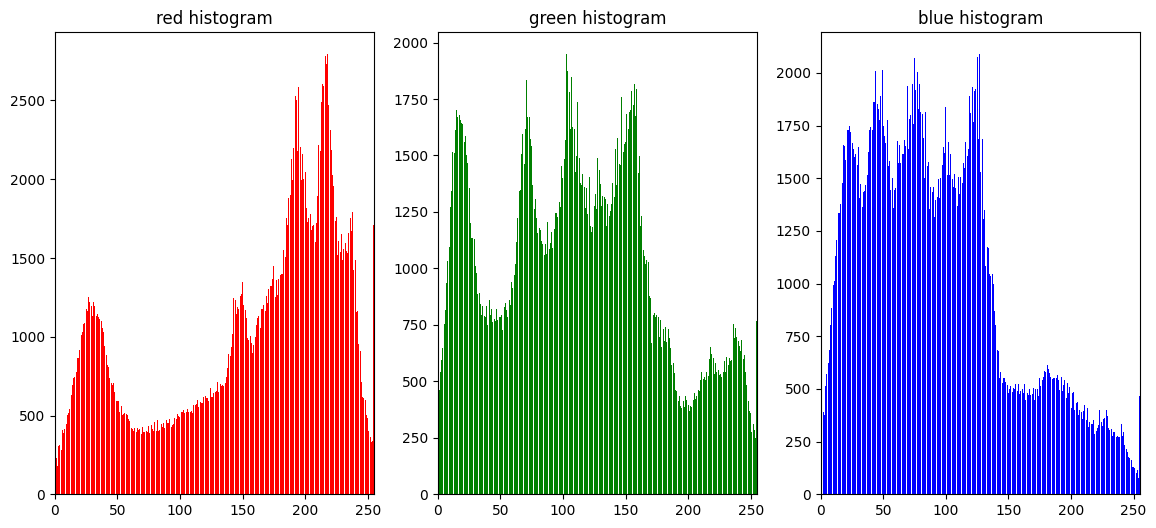

In [3]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

merahs = img[:,:,0].ravel()
hijaus = img[:,:,1].ravel()
birus = img[:,:,2].ravel()

merah = [0]*256
hijau = [0]*256
biru = [0]*256

for i in merahs:
  merah[i] += 1
for i in hijaus:
  hijau[i] += 1
for i in birus:
  biru[i] += 1

plt.figure(figsize=(14,6))
names = np.arange(256)

plt.subplot(131)
plt.title('red histogram')
plt.bar(names, merah, color='red')
plt.xlim([0, 255])

plt.subplot(132)
plt.title('green histogram')
plt.bar(names, hijau, color='green')
plt.xlim([0, 255])

plt.subplot(133)
plt.title('blue histogram')
plt.bar(names, biru, color='blue')
plt.xlim([0, 255])

plt.subplots_adjust(hspace = 1)
plt.show()

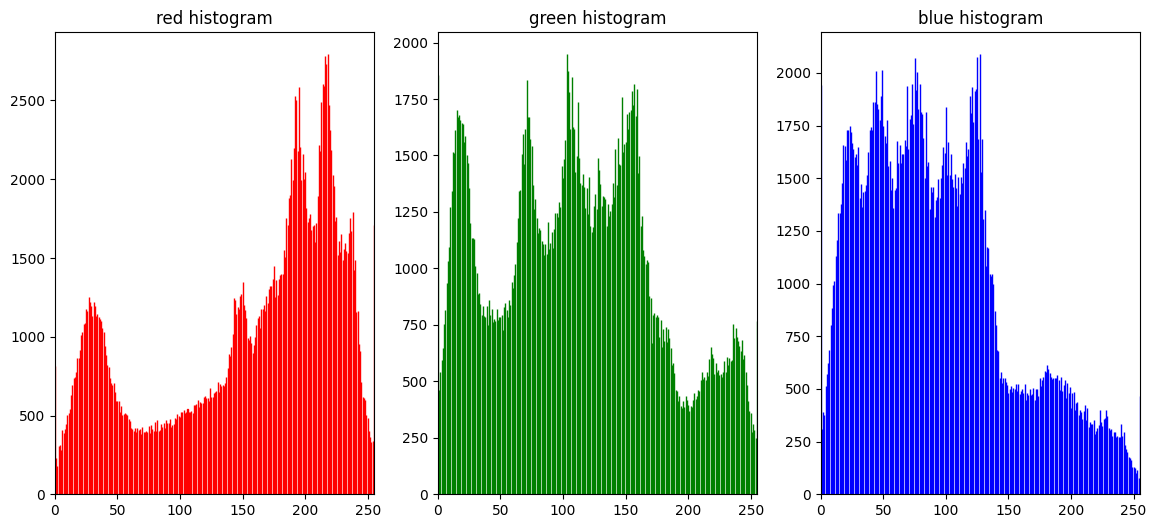

In [4]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

merah = img[:,:,0].ravel()
hijau = img[:,:,1].ravel()
biru = img[:,:,2].ravel()

hist1, bins1 = np.histogram(merah, bins=256, range=[0,256])
hist2, bins2 = np.histogram(hijau, bins=256, range=[0,256])
hist3, bins3 = np.histogram(biru, bins=256, range=[0,256])

plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('red histogram')
plt.bar(bins1[:-1], hist1, width=0.0005, color='red', edgecolor='red')
plt.xlim([0, 255])

plt.subplot(132)
plt.title('green histogram')
plt.bar(bins2[:-1], hist2, width=0.0005, color='green', edgecolor='green')
plt.xlim([0, 255])

plt.subplot(133)
plt.title('blue histogram')
plt.bar(bins3[:-1], hist3, width=0.0005, color='blue', edgecolor='blue')
plt.xlim([0, 255])

plt.show()

<Figure size 1400x600 with 0 Axes>

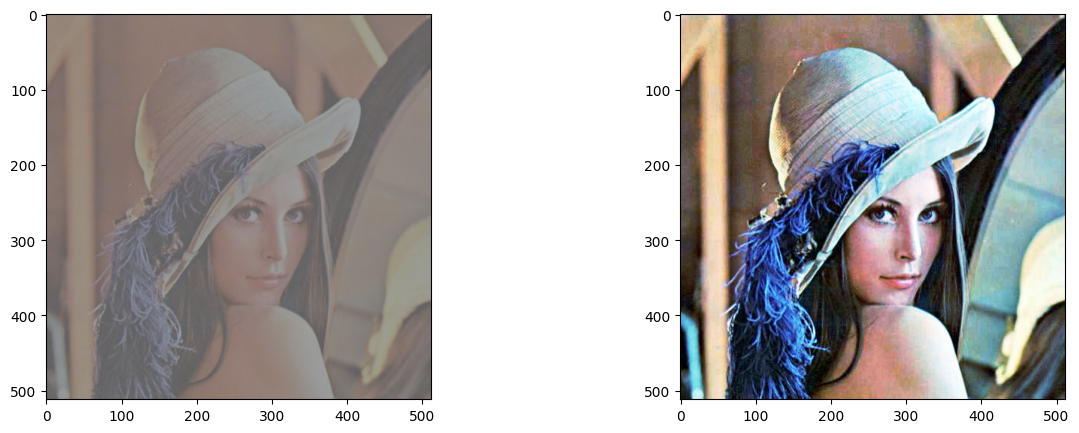

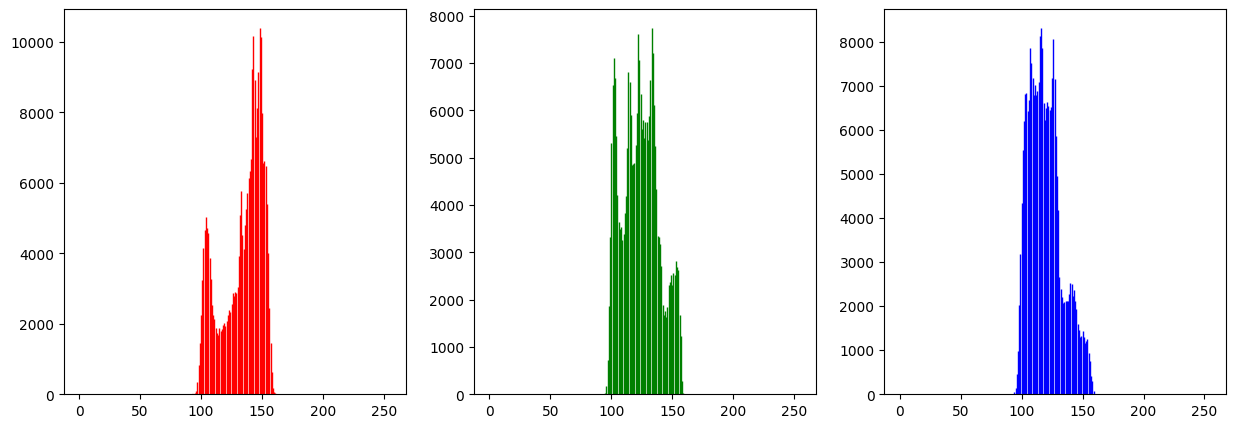

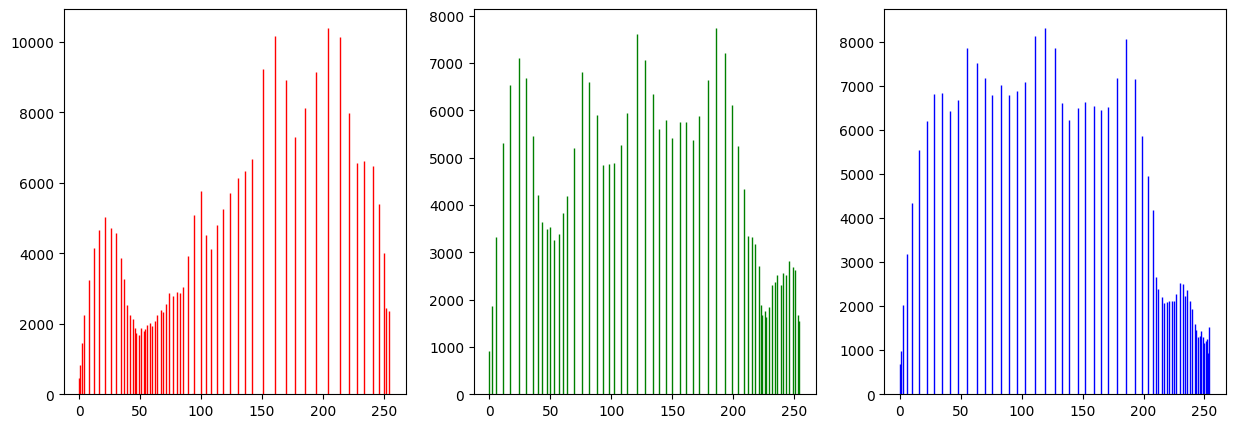

In [5]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def buat_histogram(gambar):
  merah = gambar[:,:,0].ravel()
  hijau = gambar[:,:,1].ravel()
  biru = gambar[:,:,2].ravel()

  hist1, bins1 = np.histogram(merah, bins=256, range=[0,256])
  hist2, bins2 = np.histogram(hijau, bins=256, range=[0,256])
  hist3, bins3 = np.histogram(biru, bins=256, range=[0,256])

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  axs[0].bar(bins1[:-1], hist1, width=0.0005, color='red', edgecolor='red')
  axs[1].bar(bins2[:-1], hist2, width=0.0005, color='green', edgecolor='green')
  axs[2].bar(bins3[:-1], hist3, width=0.0005, color='blue', edgecolor='blue')

  return axs

# Memisahkan channel warna
merahs, hijaus, birus = cv.split(img)

# Inisialisasi histogram dan distribusi kumulatif
histogram = np.zeros((256,3))
kumulatif = np.zeros((256,3))

# Menghitung histogram
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    for k in range(3):
      nilai = img[i,j,k]
      histogram[nilai,k] += 1

# Menghitung distribusi kumulatif
for i in range(256):
  for k in range(3):
    if i == 0:
      kumulatif[i,k] = histogram[i,k]
    else:
      kumulatif[i,k] = kumulatif[i-1,k] + histogram[i,k]

# Normalisasi distribusi kumulatif
jumlah_pixel = img.shape[0] * img.shape[1]
kumulatif = (kumulatif * 255) / jumlah_pixel

# Melakukan histogram equalization
img_eq = np.zeros(img.shape, dtype=np.uint8)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    for k in range(3):
      nilai = img[i,j,k]
      img_eq[i,j,k] = kumulatif[nilai,k]

plt.figure(figsize=(14,6))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ori = buat_histogram(img)
eq = buat_histogram(img_eq)

axs[0].imshow(img)
axs[1].imshow(img_eq)

plt.show()

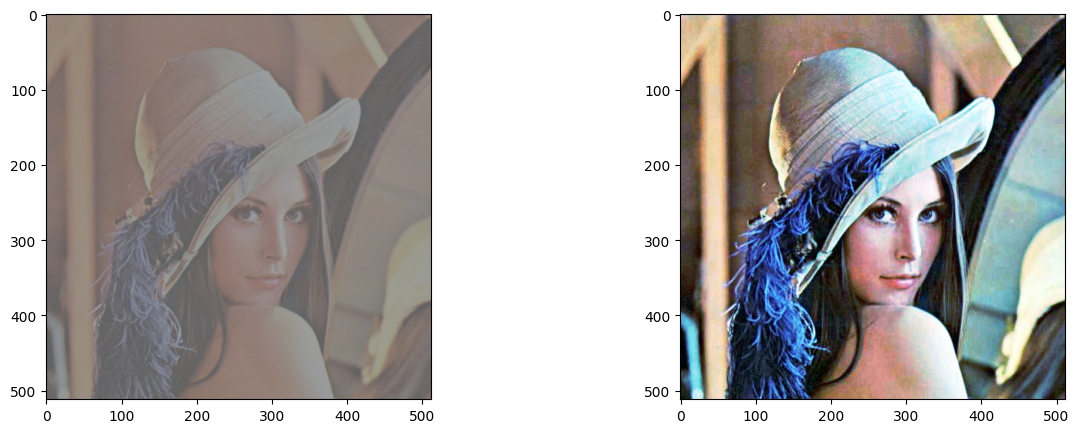

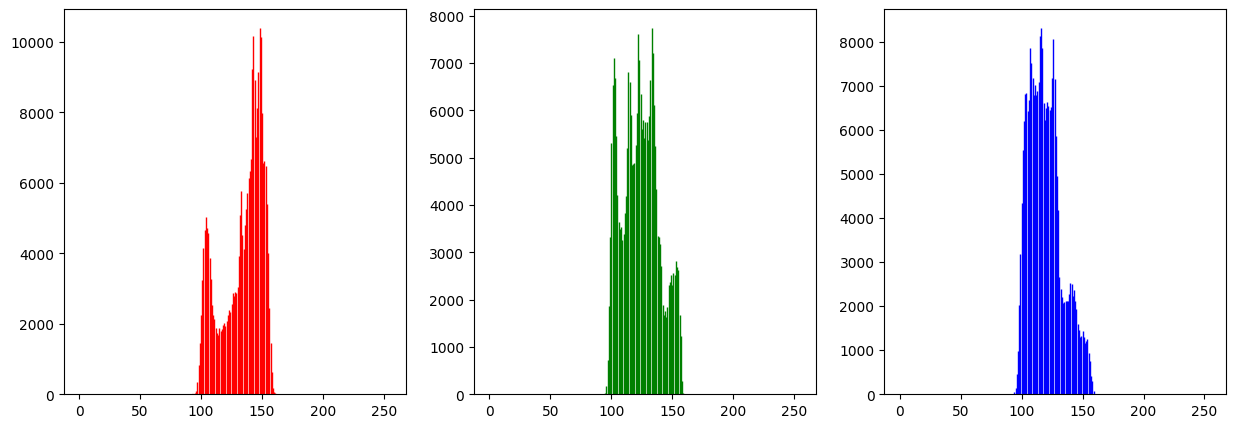

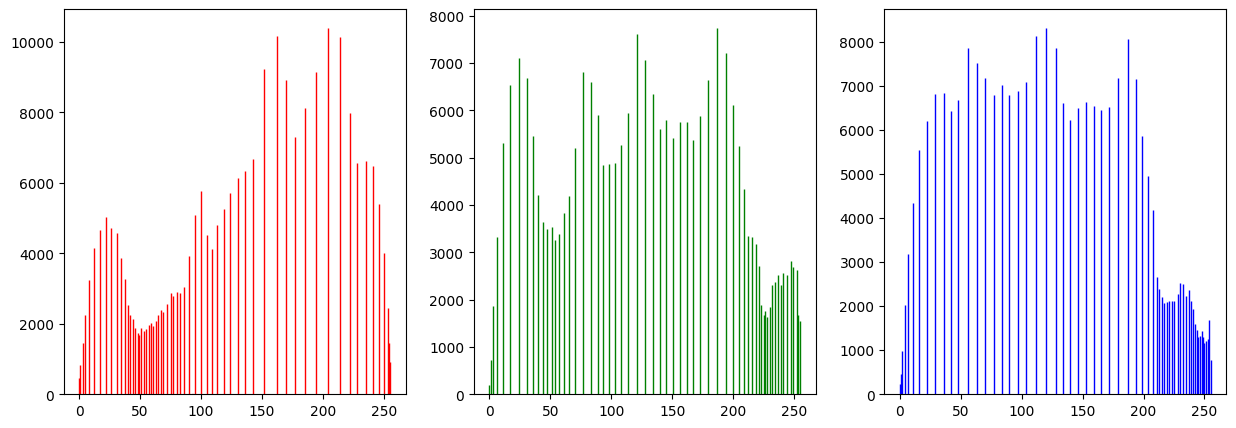

In [6]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_eq = img.copy()

img_eq[:,:,0] = cv.equalizeHist(img_eq[:,:,0])
img_eq[:,:,1] = cv.equalizeHist(img_eq[:,:,1])
img_eq[:,:,2] = cv.equalizeHist(img_eq[:,:,2])

def buat_histogram(gambar):
  merah = gambar[:,:,0].ravel()
  hijau = gambar[:,:,1].ravel()
  biru = gambar[:,:,2].ravel()

  hist1, bins1 = np.histogram(merah, bins=256, range=[0,256])
  hist2, bins2 = np.histogram(hijau, bins=256, range=[0,256])
  hist3, bins3 = np.histogram(biru, bins=256, range=[0,256])

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  axs[0].bar(bins1[:-1], hist1, width=0.0005, color='red', edgecolor='red')
  axs[1].bar(bins2[:-1], hist2, width=0.0005, color='green', edgecolor='green')
  axs[2].bar(bins3[:-1], hist3, width=0.0005, color='blue', edgecolor='blue')

  return axs

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ori = buat_histogram(img)
eq = buat_histogram(img_eq)

axs[0].imshow(img)
axs[1].imshow(img_eq)

plt.show()

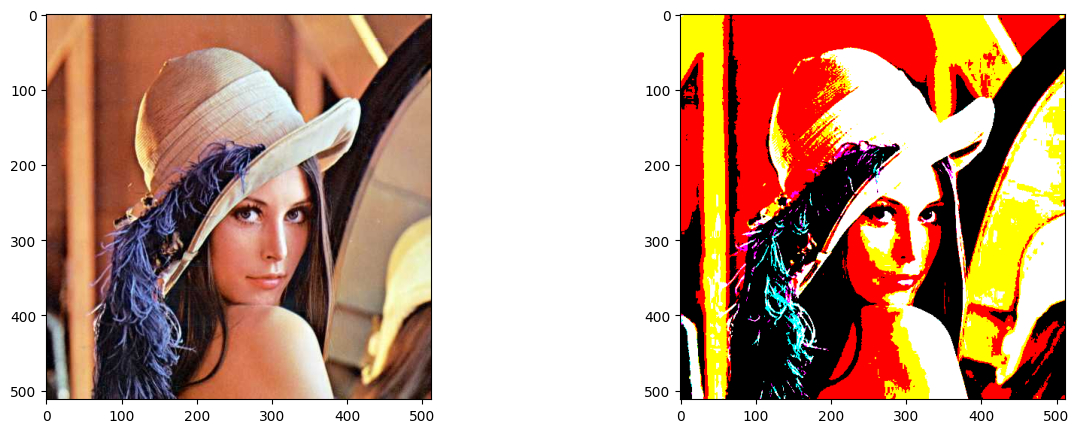

In [10]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena.jpg')
img_mapped = img.copy()

daftar_warna = [(0,0,0), (0,255,0), (255,255,0), (0, 0, 255), (0, 255, 255), (255, 0, 255), (255, 255, 255)]

height, width = img.shape[0], img.shape[1]

for i in range(height):
    for j in range(width):
        # Dapatkan nilai RGB untuk setiap piksel
        R2, G2, B2 = img_mapped[i][j]

        # Hitung jarak Euclidean untuk setiap warna yang dideklarasikan
        distances = [((R1 - R2) ** 2 + (G1 - G2) ** 2 + (B1 - B2) ** 2) ** 0.5 for R1, G1, B1 in daftar_warna]

        # Temukan indeks warna dengan jarak terkecil
        min_index = distances.index(min(distances))

        # Ubah nilai piksel ini menjadi warna dengan jarak terkecil
        img_mapped[i][j] = daftar_warna[min_index]

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_mapped = cv.cvtColor(img_mapped, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img)
axs[1].imshow(img_mapped)

plt.show()

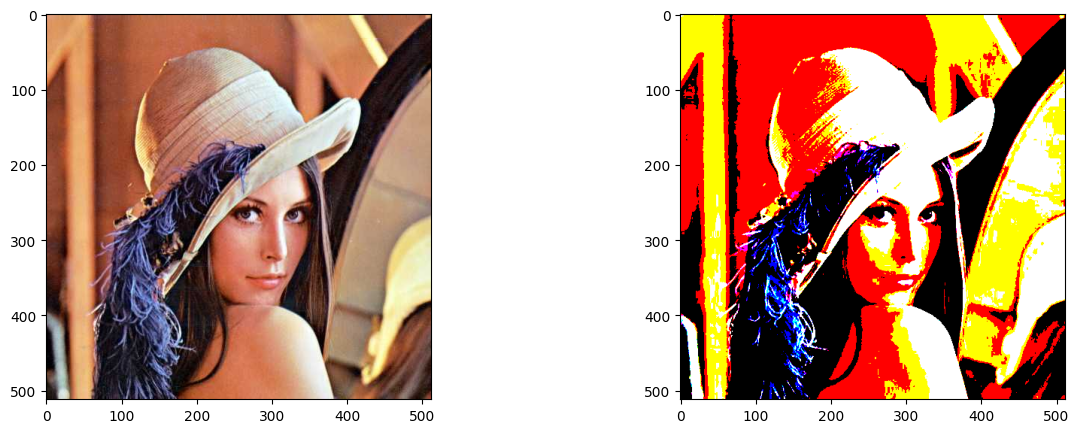

In [28]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena.jpg')
img = img.astype(float)
img_mapped = img.copy()

height, width = img.shape[0], img.shape[1]

for y in range(height):
    for x in range(width):
        old_pixel = img_mapped[y][x]
        new_pixel = np.round(old_pixel / 255) * 255
        img_mapped[y][x] = new_pixel
        quant_error = old_pixel - new_pixel

        if x + 1 < width:
          img_mapped[y][x + 1] += quant_error * 7 / 16
        if x - 1 >= 0 and y + 1 < height:
          img_mapped[y + 1][x - 1] += quant_error * 3 / 16
        if y + 1 < height:
          img_mapped[y + 1][x] += quant_error * 5 / 16
        if x + 1 < width and y + 1 < height:
          img_mapped[y + 1][x + 1] += quant_error * 1 / 16

img = cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB)
img_mapped = cv.cvtColor(img_mapped.astype(np.uint8), cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img)
axs[1].imshow(img_mapped)

plt.show()

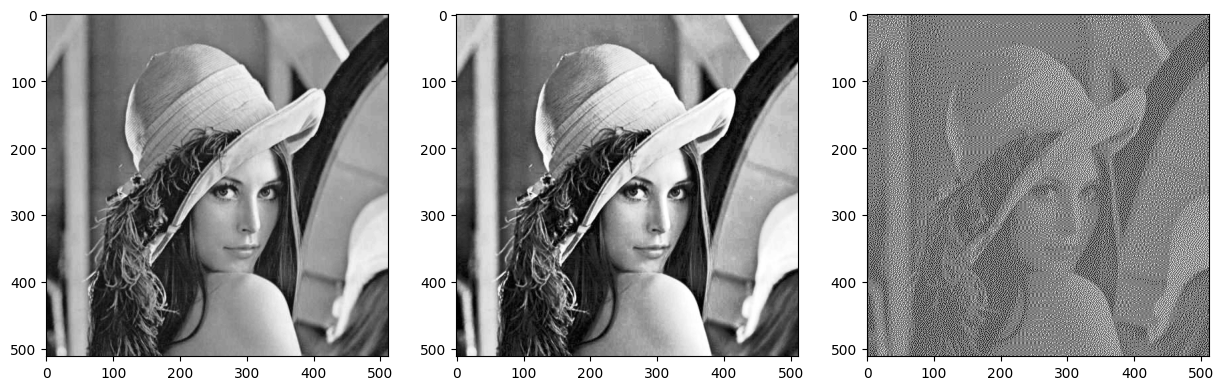

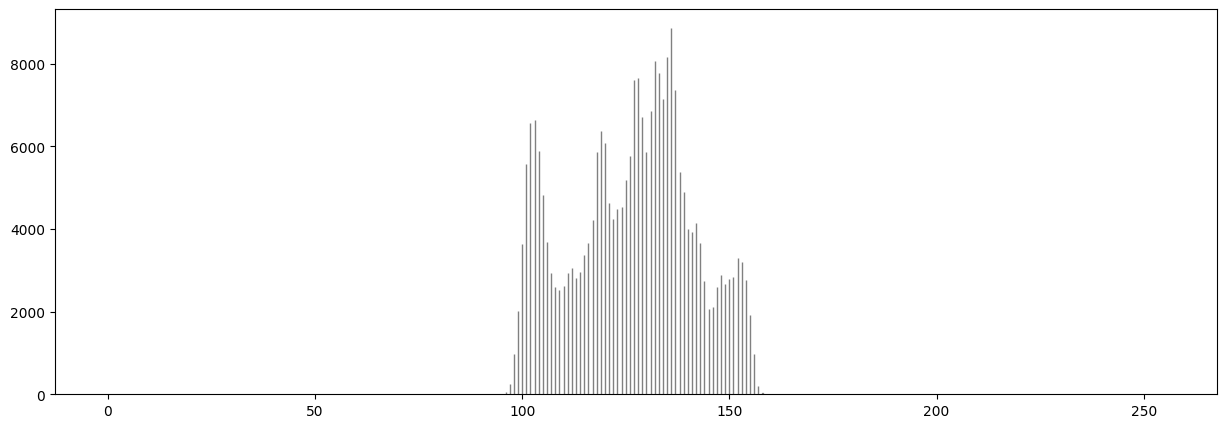

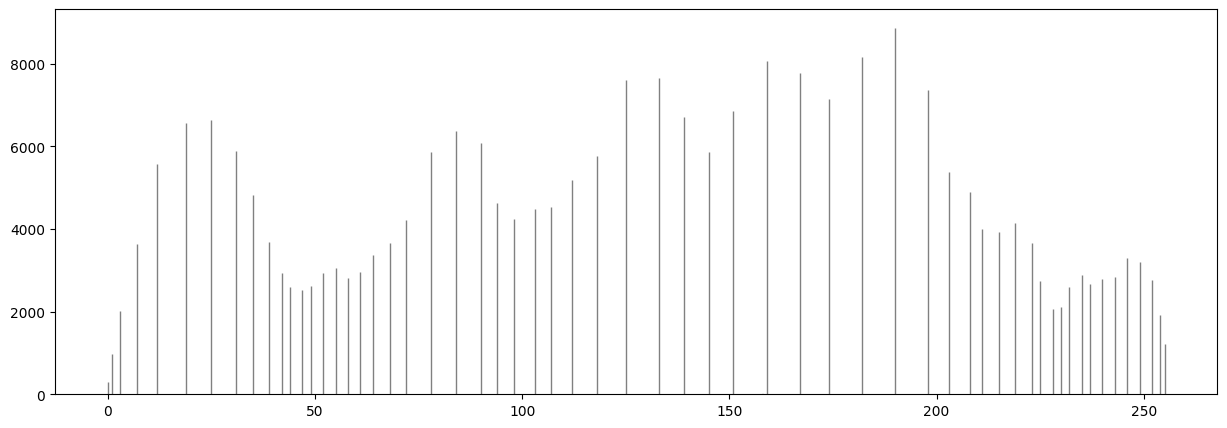

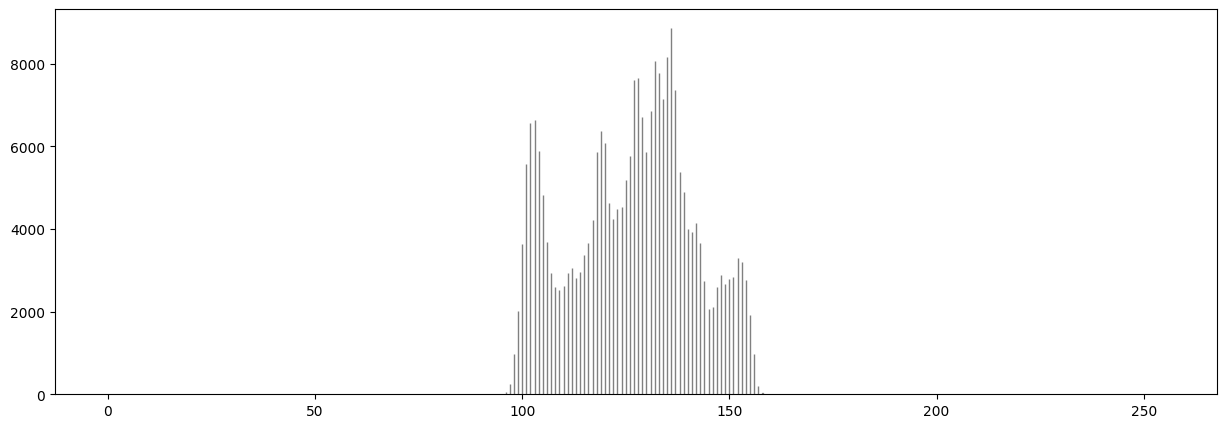

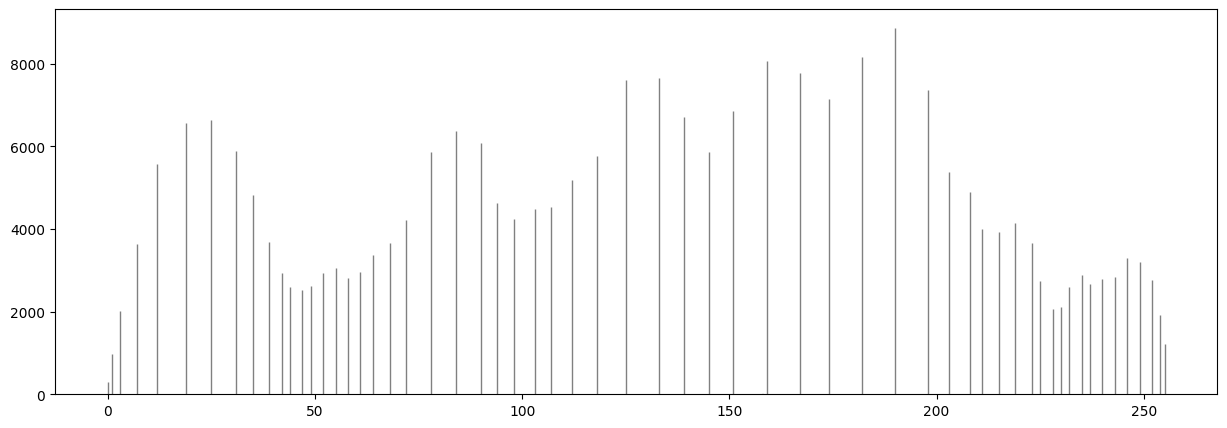

In [31]:
img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def buat_histogram(gambar):
  hist1, bins1 = np.histogram(gambar, bins=256, range=[0,256])
  fig, axs = plt.subplots(1, 1, figsize=(15, 5))
  axs.bar(bins1[:-1], hist1, width=0.0005, color='gray', edgecolor='gray')

def dither(image):
  image = image.astype(float)
  height, width = image.shape[0], image.shape[1]

  for y in range(height):
      for x in range(width):
          old_pixel = image[y][x]
          new_pixel = np.round(old_pixel / 255) * 255
          image[y][x] = new_pixel
          quant_error = old_pixel - new_pixel

          if x + 1 < width:
            image[y][x + 1] += quant_error * 7 / 16
          if x - 1 >= 0 and y + 1 < height:
            image[y + 1][x - 1] += quant_error * 3 / 16
          if y + 1 < height:
            image[y + 1][x] += quant_error * 5 / 16
          if x + 1 < width and y + 1 < height:
            image[y + 1][x + 1] += quant_error * 1 / 16

  image = image.astype(np.uint8)
  return image


img_eq = img.copy()
img_eq = cv.equalizeHist(img_eq)
img_dithered = dither(img)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ori = buat_histogram(img)
eq = buat_histogram(img_eq)

axs[0].imshow(img, cmap='gray')
hist_ori = buat_histogram(img)
axs[1].imshow(img_eq, cmap='gray')
hist_eq = buat_histogram(img_eq)
axs[2].imshow(img_dithered, cmap='gray')

plt.show()